In [1]:
import pandas as pd
import numpy as np                     
import seaborn as sns                  
import matplotlib.pyplot as plt        
%matplotlib inline 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
import lightgbm as lgb
import pickle

In [2]:
car_ride = pd.read_csv("https://raw.githubusercontent.com/akjadon/Finalprojects_DS/master/Ride_Rating_Prediction/train.csv")

In [3]:
car_ride.head()

,Unnamed: 0,customer_id,driver_id,creation_date,booking_source,car_type,estimated_distance,distance_travelled,distance_travelled_while_moving,estimated_duration,duration_time,wait_time_initial,wait_time_in_journey,estimated_price,price,is_cancelled,rating,was_rated
0,0,52400320,1838640,2017-09-08 11:32:05.000,1,1,0.0,7.28666,7.17712,0,11,18,2,0.0,17.375184,0,4,1
1,1,29858456,1793472,2017-09-08 12:42:33.000,1,1,0.0,1.25836,1.05664,0,4,1,1,0.0,8.507064,0,4,1
2,2,30828968,1726788,2017-09-08 12:46:42.000,2,1,0.0,14.57820,14.44060,0,16,3,2,0.0,19.745205,0,5,1
3,3,47974768,1181696,2017-09-08 13:52:35.000,2,1,0.0,1.51911,1.18684,0,8,0,5,0.0,10.968003,0,0,0
4,4,59503764,2063752,2017-09-08 14:18:47.000,2,1,0.0,11.09320,10.67240,0,19,1,4,0.0,17.595398,0,5,1


In [4]:
car_ride1 = car_ride.drop('Unnamed: 0', axis = 1) #axis name is space sensitive

In [5]:
car_ride1.head()

,customer_id,driver_id,creation_date,booking_source,car_type,estimated_distance,distance_travelled,distance_travelled_while_moving,estimated_duration,duration_time,wait_time_initial,wait_time_in_journey,estimated_price,price,is_cancelled,rating,was_rated
0,52400320,1838640,2017-09-08 11:32:05.000,1,1,0.0,7.28666,7.17712,0,11,18,2,0.0,17.375184,0,4,1
1,29858456,1793472,2017-09-08 12:42:33.000,1,1,0.0,1.25836,1.05664,0,4,1,1,0.0,8.507064,0,4,1
2,30828968,1726788,2017-09-08 12:46:42.000,2,1,0.0,14.57820,14.44060,0,16,3,2,0.0,19.745205,0,5,1
3,47974768,1181696,2017-09-08 13:52:35.000,2,1,0.0,1.51911,1.18684,0,8,0,5,0.0,10.968003,0,0,0
4,59503764,2063752,2017-09-08 14:18:47.000,2,1,0.0,11.09320,10.67240,0,19,1,4,0.0,17.595398,0,5,1


In [67]:
description = car_ride1.describe()
description.to_csv("description.csv", index=True)

In [7]:
car_ride1['car_type'].value_counts()

1    47931
3     2485
2      643
4       22
6        1
5        1
Name: car_type, dtype: int64

In [8]:
car_ride1['booking_source'].value_counts()

2    25728
1    25203
3      141
4       11
Name: booking_source, dtype: int64

In [9]:
car_ride1['rating'].value_counts()

5    30298
0    16206
4     3086
1      706
3      576
2      211
Name: rating, dtype: int64

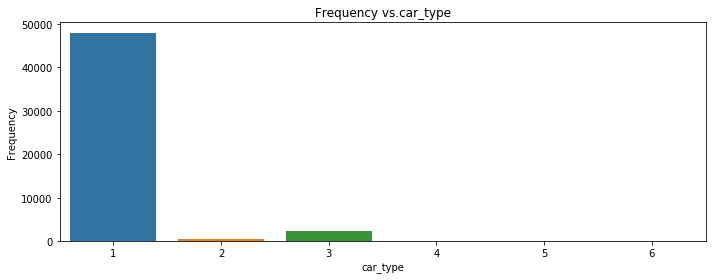

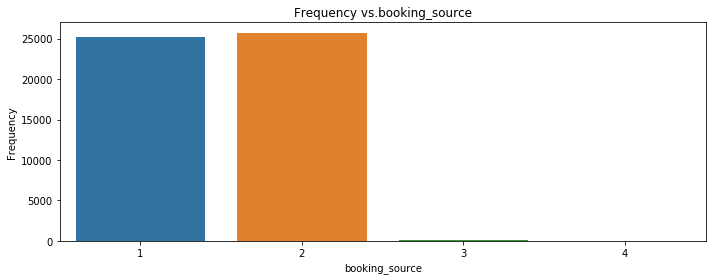

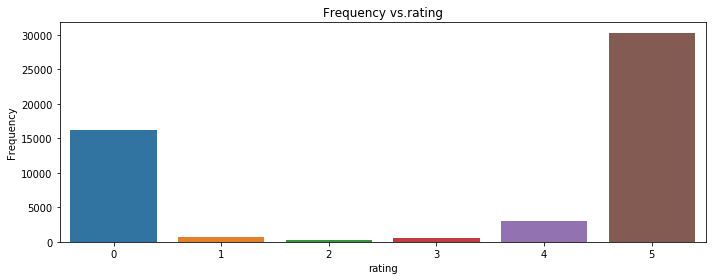

In [10]:
categorcial_variables = ['car_type', 'booking_source', 'rating']
for col in categorcial_variables:
    plt.figure(figsize=(10,4))
    sns.barplot(car_ride1[col].value_counts().index, car_ride1[col].value_counts().values)
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.title('Frequency vs.' + col)
    plt.tight_layout()

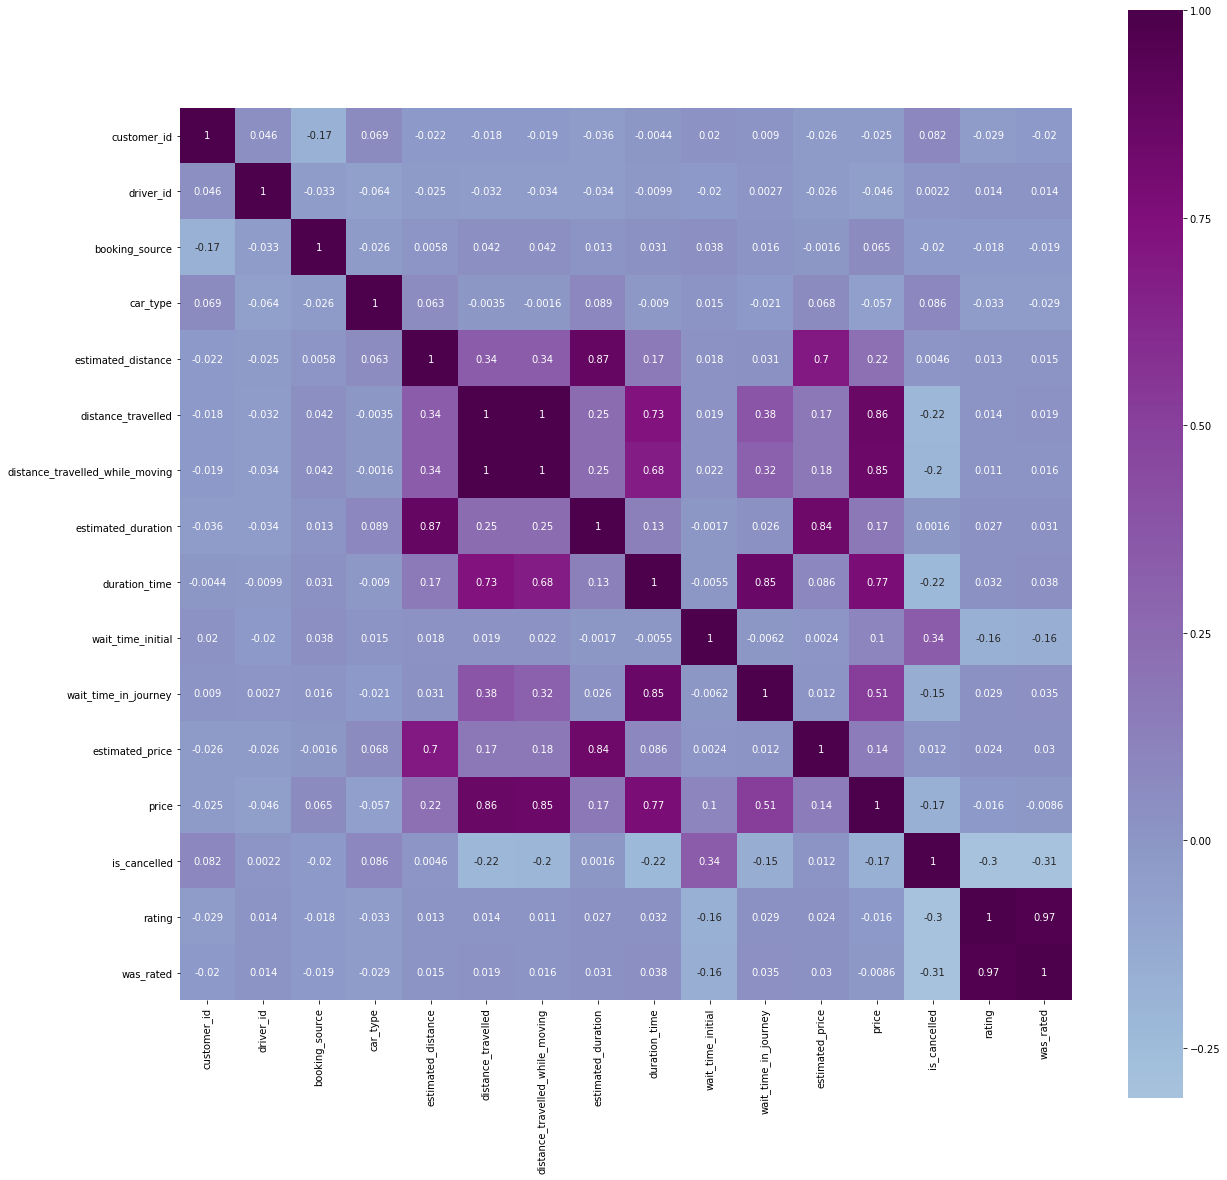

In [11]:
matrix = car_ride1.corr()
f, ax = plt.subplots(figsize = (20, 20))
sns.heatmap(matrix, square = True, center = 0, annot = True, cmap="BuPu")

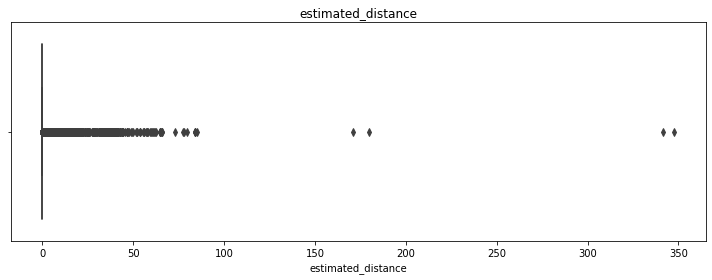

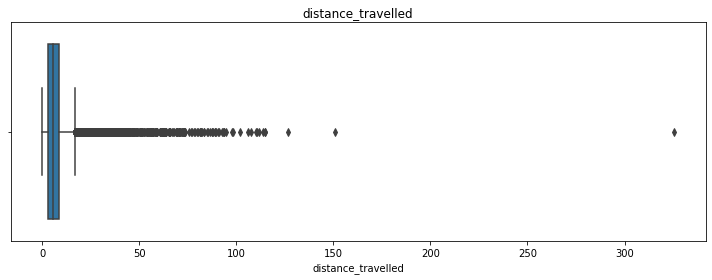

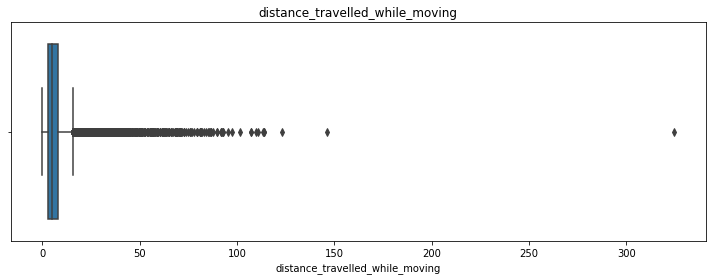

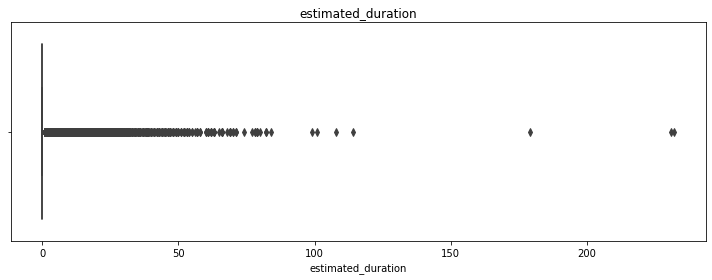

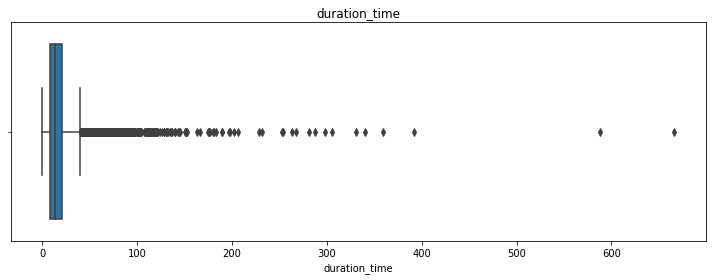

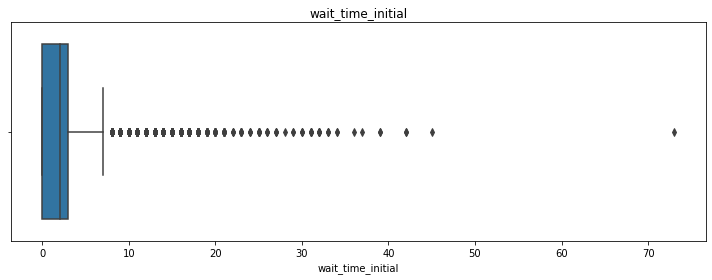

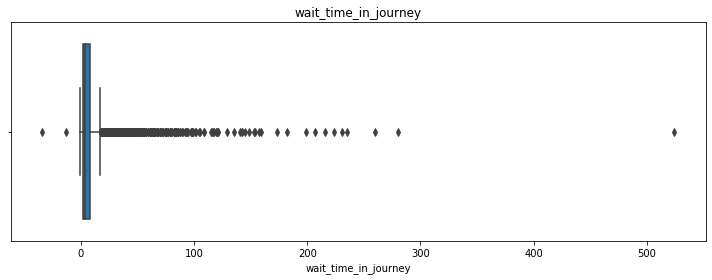

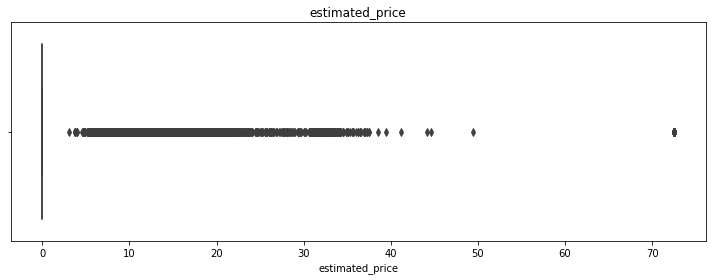

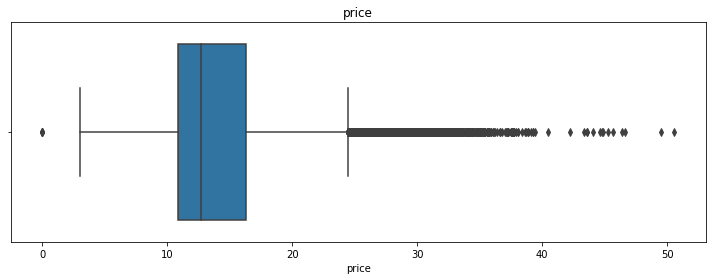

In [13]:
outlier_detection = ['estimated_distance','distance_travelled','distance_travelled_while_moving','estimated_duration','duration_time','wait_time_initial','wait_time_in_journey','estimated_price','price']
for col in outlier_detection:
    plt.figure(figsize=(10,4))
    sns.boxplot(x=car_ride1[col])
    plt.title(col)
    plt.tight_layout()

In [14]:
import scipy

In [16]:
car_ride1.estimated_distance = scipy.stats.mstats.winsorize(car_ride1.estimated_distance,0.05)
car_ride1.distance_travelled = scipy.stats.mstats.winsorize(car_ride1.distance_travelled,0.05)
car_ride1.distance_travelled_while_moving = scipy.stats.mstats.winsorize(car_ride1.distance_travelled_while_moving,0.05)
car_ride1.estimated_duration = scipy.stats.mstats.winsorize(car_ride1.estimated_duration,0.05)
car_ride1.duration_time  = scipy.stats.mstats.winsorize(car_ride1.duration_time,0.05)
car_ride1.wait_time_initial = scipy.stats.mstats.winsorize(car_ride1.wait_time_initial,0.05)
car_ride1.wait_time_in_journey = scipy.stats.mstats.winsorize(car_ride1.wait_time_in_journey,0.05)
car_ride1.estimated_price = scipy.stats.mstats.winsorize(car_ride1.estimated_price,0.05)
car_ride1.price = scipy.stats.mstats.winsorize(car_ride1.price,0.05)

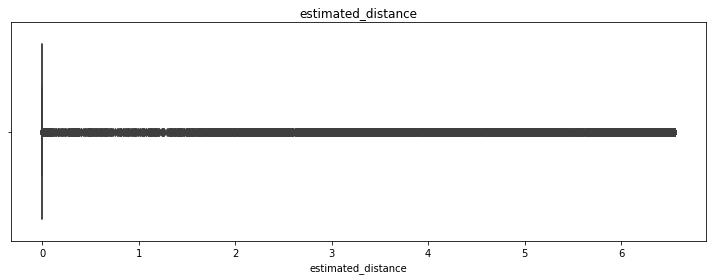

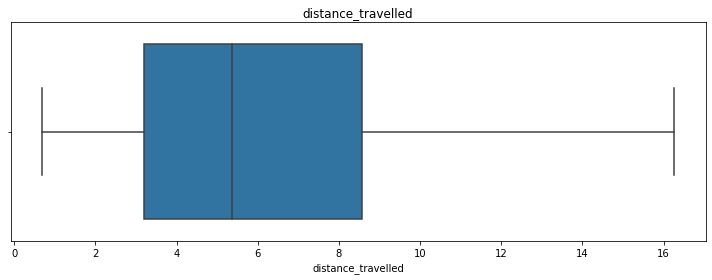

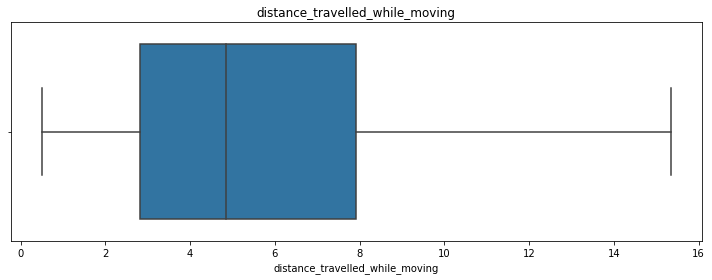

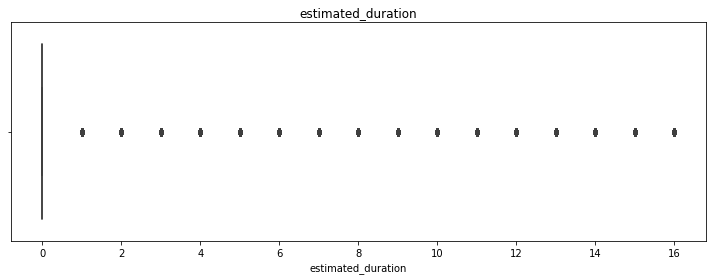

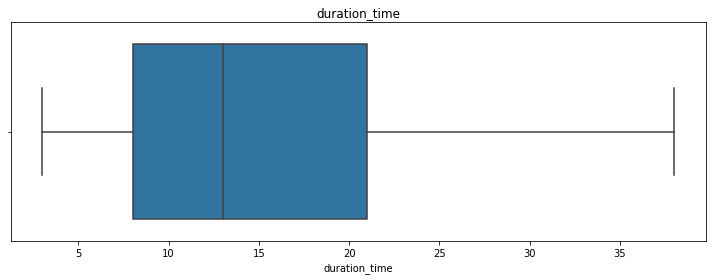

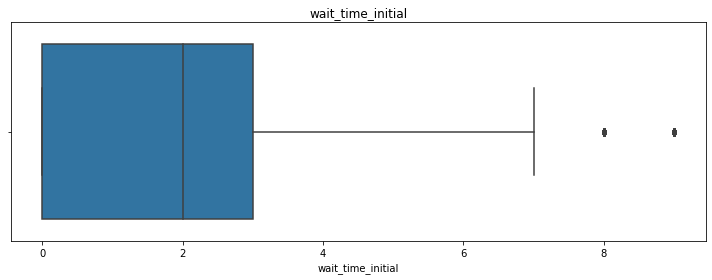

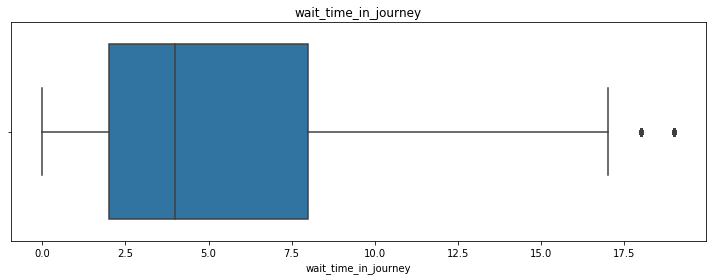

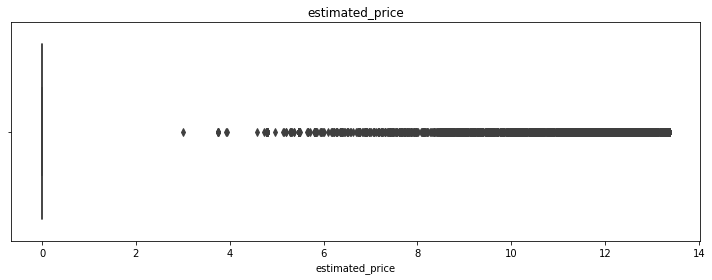

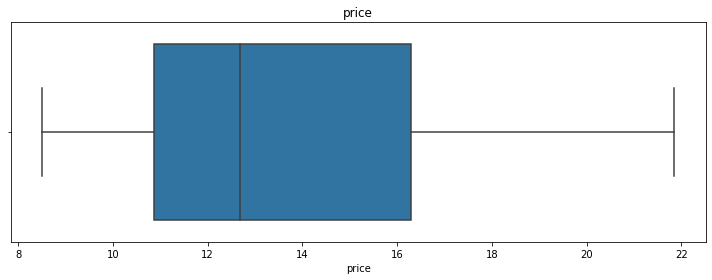

In [17]:
outlier_detection = ['estimated_distance','distance_travelled','distance_travelled_while_moving','estimated_duration','duration_time','wait_time_initial','wait_time_in_journey','estimated_price','price']
for col in outlier_detection:
    plt.figure(figsize=(10,4))
    sns.boxplot(x=car_ride1[col])
    plt.title(col)
    plt.tight_layout()

In [18]:
#since our obejctive is related to speed, I will calculate speed from the dataframe car_ride1, wkt, speed = dist/ time
car_ride1['speed'] = car_ride1['distance_travelled']/car_ride1['duration_time']
car_ride1['speed'] 

0        0.662424
1        0.314590
2        0.911138
3        0.189889
4        0.583853
5        0.394857
6        0.403670
7        0.268595
8        0.395539
9        0.369372
10       0.307541
11       0.305996
12       0.407509
13       0.544422
14       0.391275
15       0.229909
16       0.900825
17       0.872504
18       0.841258
19       0.237158
20       0.371681
21       0.408659
22       0.229909
23       0.216584
24       0.431904
25       0.142646
26       0.511552
27       0.427826
28       0.146936
29       0.282556
           ...   
51053    0.445020
51054    0.317682
51055    0.427826
51056    0.090740
51057    0.688332
51058    0.361185
51059    0.439032
51060    0.504543
51061    0.336017
51062    0.401389
51063    0.397000
51064    0.452356
51065    0.229909
51066    0.663583
51067    0.344055
51068    0.229909
51069    0.477558
51070    0.580621
51071    0.560600
51072    0.458981
51073    0.578425
51074    0.562636
51075    0.197471
51076    0.340295
51077    0

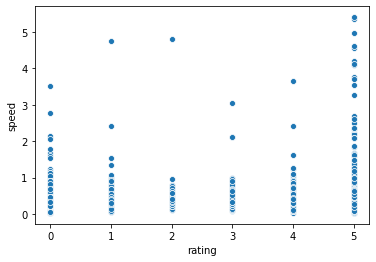

In [20]:
sns.scatterplot(y = 'speed', x = 'rating', data = car_ride1)

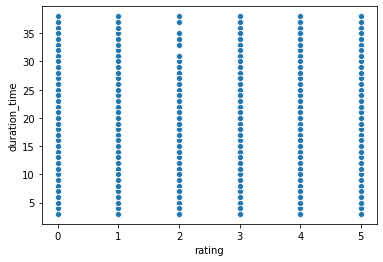

In [21]:
sns.scatterplot(y = 'duration_time', x = 'rating', data = car_ride1)

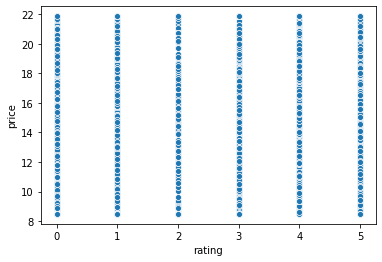

In [22]:
sns.scatterplot(y = 'price', x = 'rating', data = car_ride1)

In [41]:
car_ride2 = car_ride1.drop('customer_id', axis=1)
car_ride2 = car_ride2.drop('creation_date', axis=1)
car_ride2 = car_ride2.drop('driver_id', axis=1)
car_ride2 = car_ride2.drop('booking_source', axis=1)
car_ride3 = car_ride2.drop('rating', axis=1)

In [42]:
from sklearn.model_selection import train_test_split
X = car_ride2.drop('rating',axis=1)
y = car_ride2.rating
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [43]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [44]:
#RandomForestClassifier
features_label = car_ride3.columns[0:]
forest = RandomForestClassifier (n_estimators = 1000, random_state=0, n_jobs = -1)
forest.fit(X_train,y_train)
importances = forest.feature_importances_
indices = np. argsort(importances)[::-1]
for i in range(X.shape[1]):
    print ("%2d) %-*s %f" % (i + 1, 30, features_label[i],importances[indices[i]]))

 1) car_type                       0.651847
 2) estimated_distance             0.067867
 3) distance_travelled             0.067146
 4) distance_travelled_while_moving 0.060303
 5) estimated_duration             0.046556
 6) duration_time                  0.026561
 7) wait_time_initial              0.025255
 8) wait_time_in_journey           0.021420
 9) estimated_price                0.017713
10) price                          0.005158
11) is_cancelled                   0.003778
12) was_rated                      0.003576
13) speed                          0.002822


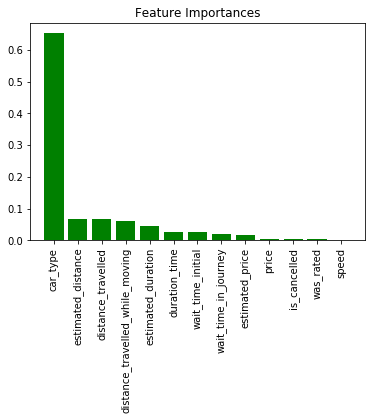

In [45]:
plt.title('Feature Importances')
plt.bar(range(X.shape[1]),importances[indices], color="green", align="center")
plt.xticks(range(X.shape[1]),features_label, rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

In [47]:
knMod = KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='auto', leaf_size=30, p=2,metric='minkowski', metric_params=None)

In [48]:
knMod

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [49]:
knMod.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [50]:
knMod.score(X_test, y_test)

0.8976835236541598

In [62]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(criterion='gini',max_depth=None)
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [66]:
#Decision Tree 
predictions = dtree.predict(X_test)
predictions

array([5, 0, 0, ..., 0, 0, 0], dtype=int64)

In [64]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,predictions))
# NOTE: predict ratings from 0-5, thus confusion matric cannot be used

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4879
           1       0.06      0.06      0.06       238
           2       0.00      0.00      0.00        61
           3       0.03      0.03      0.03       190
           4       0.09      0.10      0.10       930
           5       0.87      0.85      0.86      9027

    accuracy                           0.83     15325
   macro avg       0.34      0.34      0.34     15325
weighted avg       0.84      0.83      0.83     15325

